Dataset shape after removing duplicates: (20, 6)

--- Basic Statistics ---
        total_cases   total_deaths  people_vaccinated  total_boosters
count  2.000000e+01      20.000000       2.000000e+01    2.000000e+01
mean   1.261865e+07   69150.000000       1.826250e+08    8.314000e+07
std    2.365320e+07  117800.913677       3.411576e+08    1.856954e+08
min    3.000000e+05    1500.000000       4.000000e+06    1.500000e+06
25%    1.115000e+06   15250.000000       2.100000e+07    5.750000e+06
50%    3.150000e+06   31500.000000       8.000000e+07    2.400000e+07
75%    8.575000e+06   67000.000000       1.175000e+08    4.875000e+07
max    9.900000e+07  530000.000000       1.300000e+09    8.000000e+08

--- Missing Values ---
continent            0
location             0
total_cases          0
total_deaths         0
people_vaccinated    0
total_boosters       0
dtype: int64

--- Top 10 countries by total cases ---
       location  total_cases
1         China     99000000
0         India     4

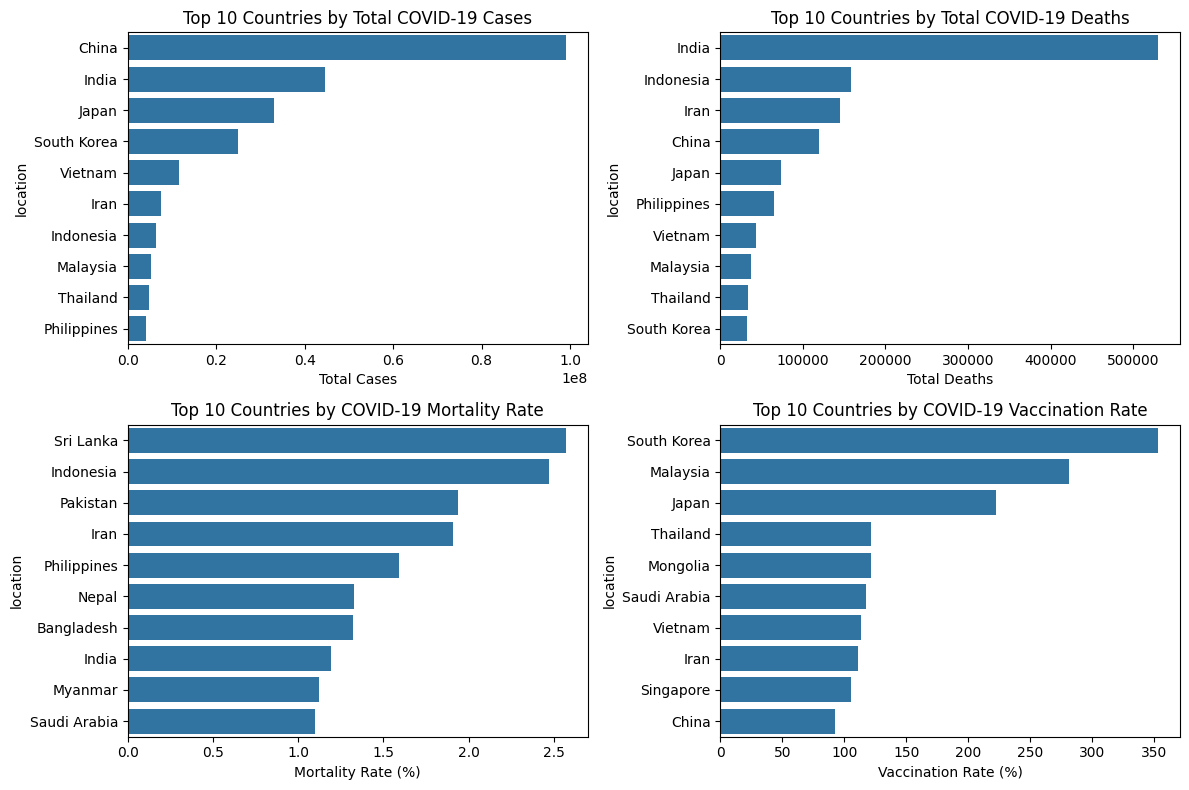

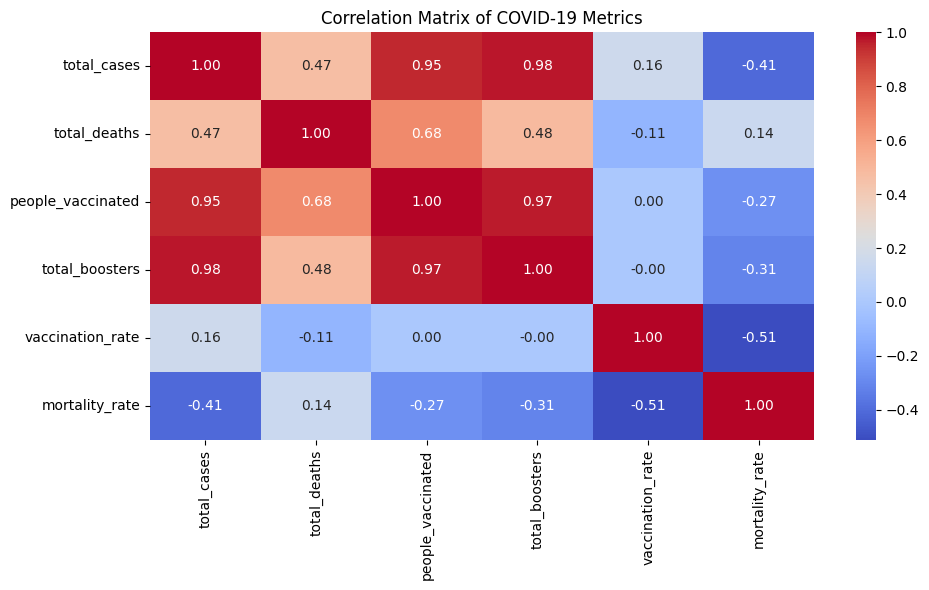

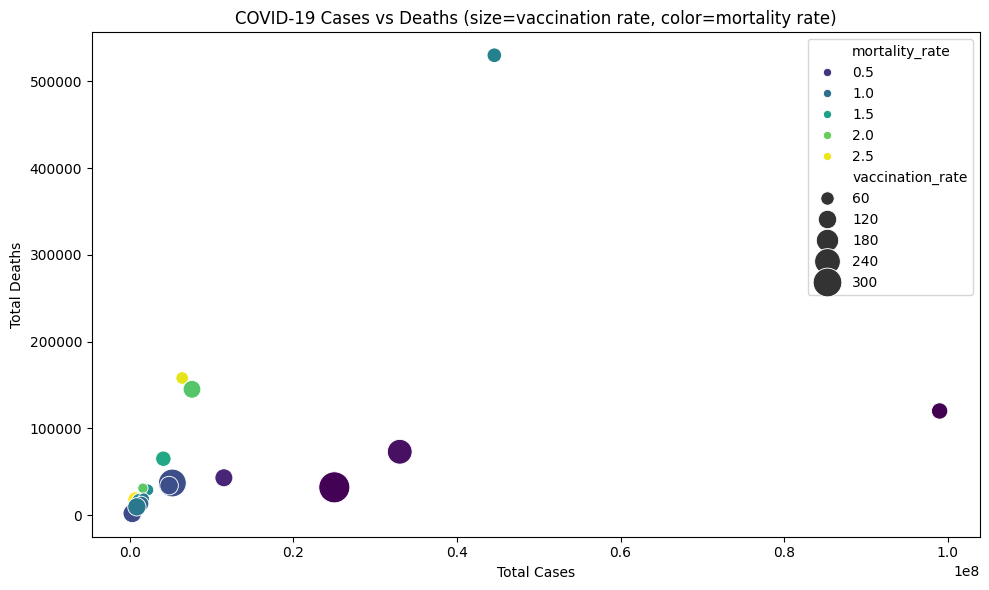

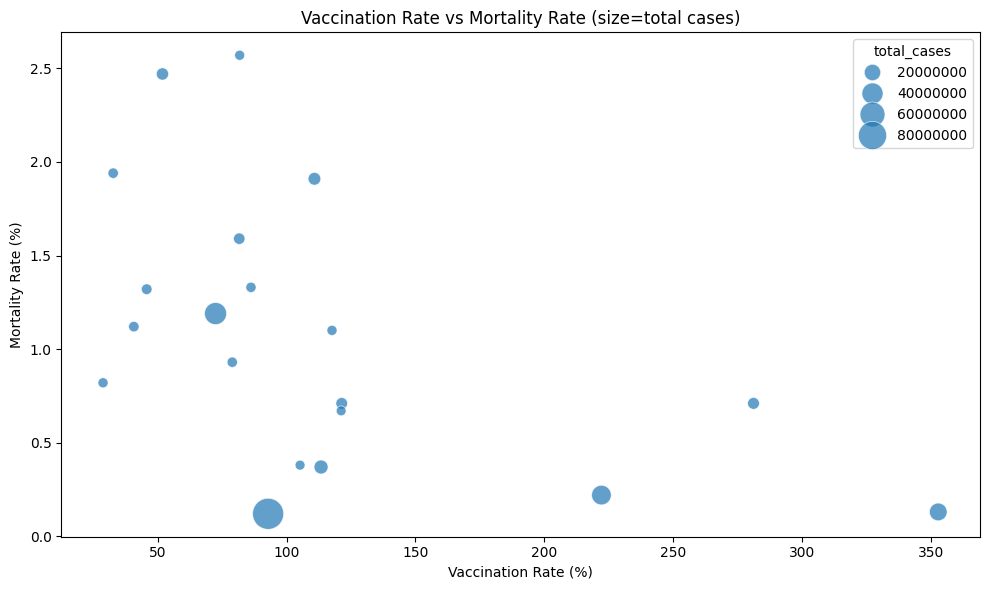


--- Statistics by Case Category ---
               total_deaths  mortality_rate  vaccination_rate  booster_rate
case_category                                                              
Low                  7600.0          1.1080            90.946       34.6920
Medium              54700.0          1.4030            93.138       31.4930
High               169500.0          0.4775           190.255       78.5125
Very High          120000.0          0.1200            92.860       57.1400

Analysis complete. Enhanced dataset exported to 'covid_analysis_results.csv'


/var/folders/h9/xh12xl9n2511z11pd_scwsym0000gn/T/ipykernel_5471/2825990594.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('case_category')[['total_deaths', 'mortality_rate',


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('sample_covid.csv')

# Clean the dataset by removing duplicates
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

# Basic statistics
print("\n--- Basic Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Top 10 countries by total cases
top_cases = df.sort_values('total_cases', ascending=False).head(10)
print("\n--- Top 10 countries by total cases ---")
print(top_cases[['location', 'total_cases']])

# Calculate mortality rate (deaths per case)
df['mortality_rate'] = (df['total_deaths'] / df['total_cases'] * 100).round(2)
print("\n--- Mortality Rate Statistics ---")
print(df['mortality_rate'].describe())

# Countries with highest mortality rates
top_mortality = df.sort_values('mortality_rate', ascending=False).head(10)
print("\n--- Top 10 countries by mortality rate ---")
print(top_mortality[['location', 'total_cases', 'total_deaths', 'mortality_rate']])

# Vaccination coverage (% of population, assuming a rough estimate)
# For simplicity, we'll use an approximate population for each country
# A better approach would be to merge with actual population data
population_estimates = {
    'India': 1380000000,
    'China': 1400000000,
    'Japan': 126000000,
    'South Korea': 51000000,
    'Indonesia': 270000000,
    'Malaysia': 32000000,
    'Thailand': 70000000,
    'Vietnam': 97000000,
    'Philippines': 109000000,
    'Bangladesh': 164000000,
    'Pakistan': 220000000,
    'Sri Lanka': 22000000,
    'Nepal': 29000000,
    'Singapore': 5700000,
    'Myanmar': 54000000,
    'Mongolia': 3300000,
    'Kazakhstan': 19000000, 
    'Uzbekistan': 33000000,
    'Iran': 83000000,
    'Saudi Arabia': 34000000
}

# Create a population column
df['estimated_population'] = df['location'].map(population_estimates)

# Calculate vaccination metrics
df['vaccination_rate'] = (df['people_vaccinated'] / df['estimated_population'] * 100).round(2)
df['booster_rate'] = (df['total_boosters'] / df['estimated_population'] * 100).round(2)

print("\n--- Vaccination Rate Statistics ---")
print(df['vaccination_rate'].describe())

# Visualizations
plt.figure(figsize=(12, 8))

# Total cases by country
plt.subplot(2, 2, 1)
sns.barplot(x='total_cases', y='location', data=df.sort_values('total_cases', ascending=False).head(10))
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.tight_layout()

# Total deaths by country
plt.subplot(2, 2, 2)
sns.barplot(x='total_deaths', y='location', data=df.sort_values('total_deaths', ascending=False).head(10))
plt.title('Top 10 Countries by Total COVID-19 Deaths')
plt.xlabel('Total Deaths')
plt.tight_layout()

# Mortality rate by country
plt.subplot(2, 2, 3)
sns.barplot(x='mortality_rate', y='location', data=df.sort_values('mortality_rate', ascending=False).head(10))
plt.title('Top 10 Countries by COVID-19 Mortality Rate')
plt.xlabel('Mortality Rate (%)')
plt.tight_layout()

# Vaccination rate by country
plt.subplot(2, 2, 4)
sns.barplot(x='vaccination_rate', y='location', data=df.sort_values('vaccination_rate', ascending=False).head(10))
plt.title('Top 10 Countries by COVID-19 Vaccination Rate')
plt.xlabel('Vaccination Rate (%)')
plt.tight_layout()

plt.figure(figsize=(10, 6))
# Correlation matrix
corr_matrix = df[['total_cases', 'total_deaths', 'people_vaccinated', 'total_boosters', 'vaccination_rate', 'mortality_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.tight_layout()

# Scatter plot: Total Cases vs Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='total_deaths', size='vaccination_rate', 
                hue='mortality_rate', data=df, sizes=(50, 500), palette='viridis')
plt.title('COVID-19 Cases vs Deaths (size=vaccination rate, color=mortality rate)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()

# Relationship between vaccination rate and mortality rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vaccination_rate', y='mortality_rate', size='total_cases', 
                data=df, sizes=(50, 500), alpha=0.7)
plt.title('Vaccination Rate vs Mortality Rate (size=total cases)')
plt.xlabel('Vaccination Rate (%)')
plt.ylabel('Mortality Rate (%)')
plt.tight_layout()

# Show plots
plt.show()

# Additional analysis: Summary statistics by group
# Let's categorize countries by case count
df['case_category'] = pd.cut(df['total_cases'], 
                             bins=[0, 1000000, 10000000, 50000000, float('inf')],
                             labels=['Low', 'Medium', 'High', 'Very High'])

print("\n--- Statistics by Case Category ---")
print(df.groupby('case_category')[['total_deaths', 'mortality_rate', 
                                  'vaccination_rate', 'booster_rate']].mean())

# Export processed data
df.to_csv('covid_analysis_results.csv', index=False)
print("\nAnalysis complete. Enhanced dataset exported to 'covid_analysis_results.csv'")